In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

In [2]:
life_file = "Resources/lifeexpectancy.csv"
hale_file = "Resources/halelife.csv"

In [3]:
life_data = pd.read_csv(life_file)
hale_data = pd.read_csv(hale_file)

In [4]:
life_results = pd.merge(life_data, hale_data, how="inner", on=["Location","Period","Sex"])
life_results = life_results.rename(columns = {"Life expectancy at birth (years)": "Life (years)", "Healthy life expectancy (HALE) at birth (years)":"HALE (years)"})
life_results.head()

,Location,Period,Sex,Life (years),HALE (years)
0,Afghanistan,2019,Both sexes,63.21,53.95
1,Afghanistan,2019,Male,63.29,54.73
2,Afghanistan,2019,Female,63.16,53.15
3,Afghanistan,2015,Both sexes,61.65,52.60
4,Afghanistan,2015,Male,61.04,52.78


In [5]:
life_results["Location"] = life_results["Location"].replace({"United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "United States of America": "United States"})

In [6]:
filtered_countries_df = pd.DataFrame(life_results.query('Location == ["Switzerland","Canada", "Japan", "Germany", "Australia", "United States", "United Kingdom", "Liberia", "Nigeria", "Madagascar"]'))
#filtered_countries_df.set_index("Location").head()
countries = filtered_countries_df["Location"].unique()
countries

array(['Australia', 'Canada', 'Germany', 'Japan', 'Liberia', 'Madagascar',
       'Nigeria', 'Switzerland', 'United Kingdom', 'United States'],
      dtype=object)

In [7]:

filtered_countries_df.dtypes

Location         object
Period            int64
Sex              object
Life (years)    float64
HALE (years)    float64
dtype: object

In [8]:
import datetime as dt
filtered_countries_df['Period'] = [dt.datetime.strptime(str(period), '%Y') for period in filtered_countries_df['Period']]

filtered_countries_df

,Location,Period,Sex,Life (years),HALE (years)
84,Australia,2019-01-01,Both sexes,83.04,70.93
85,Australia,2019-01-01,Male,81.25,70.15
86,Australia,2019-01-01,Female,84.84,71.73
87,Australia,2015-01-01,Both sexes,82.28,70.56
88,Australia,2015-01-01,Male,80.41,69.74
89,Australia,2015-01-01,Female,84.17,71.40
90,Australia,2010-01-01,Both sexes,81.90,70.17
91,Australia,2010-01-01,Male,79.84,69.16
92,Australia,2010-01-01,Female,83.99,71.19
93,Australia,2000-01-01,Both sexes,79.69,68.57


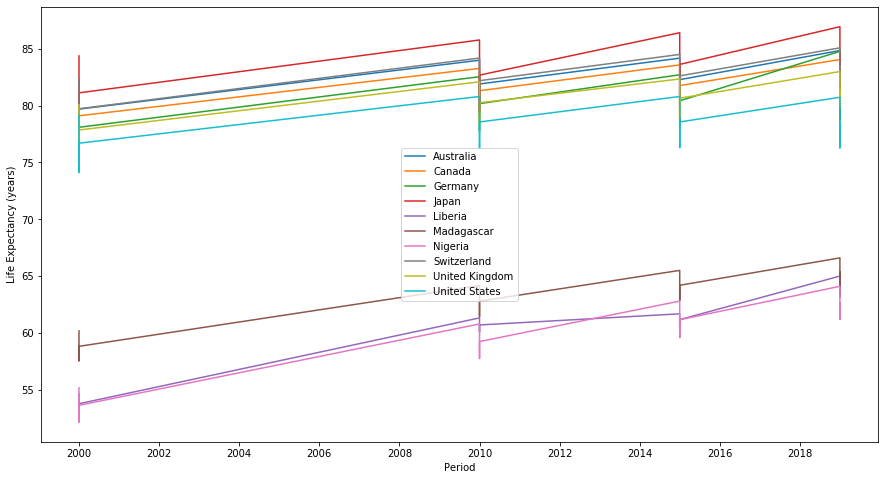

In [9]:
plt.figure(figsize = (15, 8))

for country in countries:
    df = filtered_countries_df[filtered_countries_df["Location"]==country]
    plt.plot(df["Period"], df["Life (years)"], label = country)

plt.xlabel("Period")
plt.ylabel("Life Expectancy (years)")
plt.legend()    
plt.show()

In [10]:
# Group by mean for life expectancy for each country and make a bar chart for it
life_2000 = pd.DataFrame(filtered_countries_df.query("Period == '2000'"))
life_2010 = pd.DataFrame(filtered_countries_df.query("Period == '2010'"))
life_2015 = pd.DataFrame(filtered_countries_df.query("Period == '2015'"))
life_summary_2000 = life_2000.groupby("Location").mean()

years = [life_2000, life_2010, life_2015]

for year in years:
    life_summary = year.groupby("Location").mean()
    display(life_summary.sort_values(["Location"], ascending = False))


,Life (years),HALE (years)
Location,,
United States,76.660000,65.780000
United Kingdom,77.810000,67.546667
Switzerland,79.653333,69.243333
Nigeria,53.653333,46.470000
Madagascar,58.846667,51.336667
Liberia,53.776667,45.833333
Japan,81.060000,71.526667
Germany,78.016667,68.410000
Canada,79.063333,69.390000


,Life (years),HALE (years)
Location,,
United States,78.543333,66.726667
United Kingdom,80.226667,69.433333
Switzerland,82.133333,71.336667
Nigeria,59.260000,51.513333
Madagascar,62.796667,55.083333
Liberia,60.696667,52.060000
Japan,82.636667,72.940000
Germany,80.163333,69.960000
Canada,81.280000,70.816667


,Life (years),HALE (years)
Location,,
United States,78.556667,66.556667
United Kingdom,80.640000,69.666667
Switzerland,82.583333,71.726667
Nigeria,61.183333,53.136667
Madagascar,64.186667,56.303333
Liberia,61.166667,52.476667
Japan,83.576667,73.590000
Germany,80.416667,70.066667
Canada,81.740000,71.136667


In [11]:
# merge the three dataframe
life_arrange = life_summary_2000.groupby(["Location"])

In [14]:
life_2000_bar = life_summary_2000.plot.bar("Location", "Life (years)", color ="green", alpha = 0.5)

plt.title("Countries with Life Expectancy (years)")
plt.xlabel("Location")
plt.ylabel("Life Expectancy")


KeyError: 'Location'

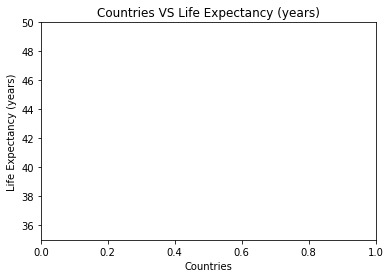

In [17]:
# Bar chart for Period and Life Expectancy (years)
x_axis = life_2000["Location"]
y_axis = life_2000["Life (years)"]

fig1, ax1 = plt.subplots()
ax1.set_title("Countries VS Life Expectancy (years)")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Life Expectancy (years)")


plt.ylim(35,50)

plt.show()

In [ ]:
# Bar chart for Period and  (years)
# x_axis = life_compare_df["Period"]
# y_axis = life_compare_df["HALE (years)"]

# fig1, ax1 = plt.subplots()
# ax1.set_title("Period VS Life Expectancy (years)")
# ax1.set_xlabel("Period")
# ax1.set_ylabel("Life Expectancy (years)")


# plt.ylim(35,50)

# plt.show()